In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import time
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Molecular-data.csv')
data.head()

,Molar volume,Density
0,26.379294,5.254
1,25.847969,5.362
2,26.510484,5.228
3,25.737570,5.385
4,25.402642,5.456


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Molar volume  50 non-null     float64
 1   Density       50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [4]:
data.describe()

,Molar volume,Density
count,50.000000,50.000000
mean,26.703613,5.386080
std,1.331481,0.267123
min,22.778641,4.609000
25%,25.975829,5.258000
50%,26.553503,5.373500
75%,27.372057,5.488750
max,30.605477,6.409000


In [5]:
mv = data['Molar volume']
density = data['Density']

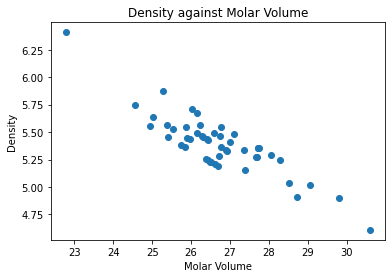

In [6]:
plt.scatter(mv, density)
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.show()

From the scattering above, we can noticed that the higher the molar volume, the smaller the density value. Although the relationship can be observed through this plotting, we still need a model to make prediction on density according to the feature, in this case, molar volume is the only feature input.

In [7]:
input_X = data['Molar volume'].values
input_X

array([26.37929429, 25.84796945, 26.51048435, 25.73756958, 25.40264153,
       24.93196838, 26.61229113, 26.69430127, 26.43463899, 26.49528048,
       25.3706195 , 25.01962476, 25.90645444, 30.6054772 , 25.53596025,
       24.55791163, 28.71171268, 26.72615468, 25.96367465, 27.37978346,
       26.42689681, 26.28653418, 26.30580583, 26.15241921, 26.92766916,
       25.87891753, 26.77195982, 26.89235087, 26.4074474 , 28.52235227,
       26.73778549, 29.06975484, 26.59652192, 27.70176638, 22.77864079,
       27.67026323, 27.34887763, 27.00486659, 29.81178452, 26.2238744 ,
       26.01229035, 27.7118053 , 27.09475105, 25.2856653 , 28.06278658,
       27.72733302, 28.27659829, 26.15435888, 27.73769451, 26.77708171])

In [8]:
actual_Y = data['Density'].values
actual_Y

array([5.254, 5.362, 5.228, 5.385, 5.456, 5.559, 5.208, 5.192, 5.243,
       5.231, 5.56 , 5.638, 5.445, 4.609, 5.524, 5.744, 4.913, 5.278,
       5.433, 5.152, 5.431, 5.46 , 5.456, 5.488, 5.33 , 5.546, 5.361,
       5.337, 5.435, 5.032, 5.46 , 5.022, 5.489, 5.27 , 6.409, 5.276,
       5.338, 5.406, 4.897, 5.567, 5.707, 5.357, 5.479, 5.871, 5.29 ,
       5.354, 5.25 , 5.676, 5.352, 5.544])

In [9]:
train_features, test_features, train_labels, test_labels = train_test_split(input_X, actual_Y, test_size=0.2)
print('Shape of train_features is', train_features.shape)
print('Shape of test_features is', test_features.shape)
print('Shape of train_labels is', train_labels.shape)
print('Shape of test_labels is', test_labels.shape)

Shape of train_features is (40,)
Shape of test_features is (10,)
Shape of train_labels is (40,)
Shape of test_labels is (10,)


In [10]:
train_X = train_features.reshape([train_features.shape[0],1])
test_x = test_features.reshape([test_features.shape[0],1])
train_Y = train_labels.reshape([train_labels.shape[0],1])
test_y = test_labels.reshape([test_labels.shape[0],1])
print('Shape of train_X is', train_X.shape)
print('Shape of test_x is', test_x.shape)
print('Shape of train_Y is', train_Y.shape)
print('Shape of test_y is', test_y.shape)

Shape of train_X is (40, 1)
Shape of test_x is (10, 1)
Shape of train_Y is (40, 1)
Shape of test_y is (10, 1)


In [11]:
X = tf.constant(train_X, dtype=tf.float32)
Y = tf.constant(train_Y, dtype=tf.float32) 
                                                          
test_X = tf.constant(test_x, dtype=tf.float32) 
test_Y = tf.constant(test_y, dtype=tf.float32)

m = tf.Variable(1., shape=tf.TensorShape(None))
b = tf.Variable(1)

In [18]:
def mean_squared_error(Y , y_pred):
    return tf.reduce_mean(tf.square(Y - y_pred))

def mean_squared_error_deriv(Y , y_pred):
    return tf.reduce_mean((y_pred - Y))
    
def predict(x, m, b):
    return m*x + b

In [36]:
num_epochs = 1000000
num_samples = X.shape[0]
batch_size = 25
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices((X , Y)) 
dataset = dataset.repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal((num_features , 1)) 
bias = 0.000

epochs_plot = []
loss_plot = []

# time the computation
start_time = time.time()

for i in range(num_epochs):
    
    epoch_loss = []
    for b in range(int(num_samples/batch_size)):
        x_batch , y_batch = iterator.get_next()
   
        output = predict(x_batch , weights , bias) 
        loss = epoch_loss.append(mean_squared_error(y_batch,output).numpy())
    
        dJ_dH = mean_squared_error_deriv(y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
        dJ_dB = tf.reduce_mean(dJ_dH)
    
        weights -= (learning_rate * dJ_dW)
        bias -= (learning_rate * dJ_dB) 
        
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i + 1)
    loss_plot.append(loss) 
    
    if i % 10000 == 0:
      print('Epoch: {}, Training loss: {}'.format(i, loss))

print("\n--- %s seconds ---" % (time.time() - start_time)) 

Epoch: 0, Training loss: 97.24431610107422
Epoch: 10000, Training loss: 0.1585189700126648
Epoch: 20000, Training loss: 0.15833985805511475
Epoch: 30000, Training loss: 0.1581609547138214
Epoch: 40000, Training loss: 0.15798228979110718
Epoch: 50000, Training loss: 0.15780368447303772
Epoch: 60000, Training loss: 0.1576254665851593
Epoch: 70000, Training loss: 0.15744735300540924
Epoch: 80000, Training loss: 0.1572694629430771
Epoch: 90000, Training loss: 0.1570918709039688
Epoch: 100000, Training loss: 0.15691445767879486
Epoch: 110000, Training loss: 0.15673719346523285
Epoch: 120000, Training loss: 0.15656018257141113
Epoch: 130000, Training loss: 0.1563834547996521
Epoch: 140000, Training loss: 0.15620683133602142
Epoch: 150000, Training loss: 0.15603038668632507
Epoch: 160000, Training loss: 0.1558542251586914
Epoch: 170000, Training loss: 0.15567828714847565
Epoch: 180000, Training loss: 0.15550243854522705
Epoch: 190000, Training loss: 0.15532690286636353
Epoch: 200000, Training

Although given 100000 iteration learning, it did not converge nicely, we may try normalized the data on next section.

In [37]:
pred_Y = predict(test_X, weights , bias)
pred_Y

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.6395893],
       [5.214584 ],
       [5.283212 ],
       [5.034375 ],
       [5.1142044],
       [5.2111793],
       [5.2908936],
       [5.0785904],
       [5.562726 ],
       [4.591507 ]], dtype=float32)>

In [38]:
test_Y

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[4.913],
       [5.456],
       [5.192],
       [5.871],
       [5.385],
       [5.46 ],
       [5.46 ],
       [5.524],
       [5.25 ],
       [6.409]], dtype=float32)>

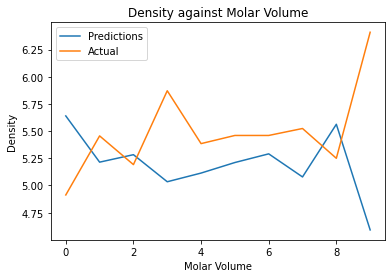

In [39]:
plt.plot(pred_Y, label='Predictions')
plt.plot(test_Y, label='Actual')
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.legend()
plt.show()

In [40]:
x = input_X.reshape(-1,1).astype(np.float32)
pred_all = predict(x, weights , bias)
pred_all.numpy()[:10]

array([[5.227566 ],
       [5.1337066],
       [5.2507405],
       [5.1142044],
       [5.055039 ],
       [4.9718943],
       [5.268725 ],
       [5.283212 ],
       [5.2373424],
       [5.248055 ]], dtype=float32)

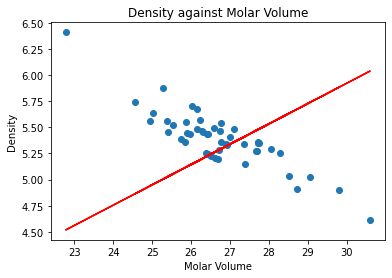

In [35]:
plt.scatter(mv, density)
plt.plot(mv, pred_all,'r-')
plt.title('Density against Molar Volume')
plt.xlabel('Molar Volume')
plt.ylabel('Density')
plt.show()

normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model might converge without feature normalization, normalization makes training much more stable.

In [13]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
normalizer(train_features).numpy()

array([[-0.77049965],
       [-0.7479726 ],
       [ 0.15061937],
       [-0.25382534],
       [ 0.08746652],
       [ 0.7289548 ],
       [-1.4734727 ],
       [ 0.05857316],
       [-0.66138923],
       [-0.07738966],
       [-0.03572623],
       [-0.31587344],
       [ 0.7416578 ],
       [-0.33811808],
       [-1.851193  ],
       [-0.26626304],
       [ 2.4469125 ],
       [ 0.45733345],
       [-0.7958182 ],
       [-0.546752  ],
       [-0.48829585],
       [ 0.7207426 ],
       [ 0.22415335],
       [-0.36115068],
       [ 1.8398709 ],
       [-1.1863304 ],
       [ 1.0160862 ],
       [ 0.4320492 ],
       [-1.1601334 ],
       [ 0.7501337 ],
       [-0.03991738],
       [ 3.0962183 ],
       [-1.5451827 ],
       [ 1.3920496 ],
       [ 0.69496995],
       [-0.5451651 ],
       [-0.1834402 ],
       [-0.17053905],
       [-0.32220697],
       [-0.7011615 ]], dtype=float32)

In [14]:
normalized_train_X = normalizer(train_features)
normalized_train_Y = normalizer(train_labels)

normalized_X = tf.constant(normalized_train_X, dtype=tf.float32)
normalized_Y = tf.constant(normalized_train_Y, dtype=tf.float32)

In [20]:
num_epochs = 100000
num_samples = X.shape[0]
batch_size = 25
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices((normalized_X , normalized_Y)) 
dataset = dataset.repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal((num_features , 1)) 
bias = 0.000

epochs_plot = []
loss_plot = []

# time the computation
start_time = time.time()

for i in range(num_epochs):
    
    epoch_loss = []
    for b in range(int(num_samples/batch_size)):
        x_batch , y_batch = iterator.get_next()
   
        output = predict(x_batch , weights , bias) 
        loss = epoch_loss.append(mean_squared_error(y_batch,output).numpy())
    
        dJ_dH = mean_squared_error_deriv(y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean(dJ_dH * dH_dW)
        dJ_dB = tf.reduce_mean(dJ_dH)
    
        weights -= (learning_rate * dJ_dW)
        bias -= (learning_rate * dJ_dB) 
        
    loss = np.array(epoch_loss).mean()
    epochs_plot.append(i + 1)
    loss_plot.append(loss) 
    
    if i % 10000 == 0:
      print('Epoch: {}, Training loss: {}'.format(i, loss))

print("\n--- %s seconds ---" % (time.time() - start_time)) 

Epoch: 0, Training loss: 307.61004638671875
Epoch: 10000, Training loss: 0.05892331525683403
Epoch: 20000, Training loss: 0.041483260691165924
Epoch: 30000, Training loss: 0.02982843667268753
Epoch: 40000, Training loss: 0.022122325375676155
Epoch: 50000, Training loss: 0.017079316079616547
Epoch: 60000, Training loss: 0.013819382525980473
Epoch: 70000, Training loss: 0.011757212691009045
Epoch: 80000, Training loss: 0.010491017252206802
Epoch: 90000, Training loss: 0.009741414338350296

--- 75.3035535812378 seconds ---


In [21]:
weights.numpy()

array([[-0.12452056]], dtype=float32)

In [22]:
bias.numpy()

-17.556873

In [23]:
pred_test = predict(test_X, weights , bias)
pred_test

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-21.132072],
       [-20.832487],
       [-20.880863],
       [-20.70546 ],
       [-20.76173 ],
       [-20.830088],
       [-20.886278],
       [-20.736626],
       [-21.07789 ],
       [-20.393282]], dtype=float32)>

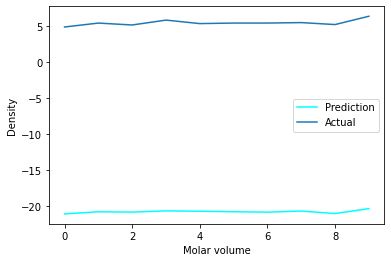

In [24]:
actual_test_trend=test_Y
plt.plot(pred_test, color='cyan', label='Prediction')
plt.plot(actual_test_trend, label='Actual')
plt.xlabel('Molar volume')
plt.ylabel('Density')
plt.legend()